### AI-06 Practice 1  

#### Import libraries  

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Parameters  

In [51]:
csv_in = '../ai-05/cls-data1.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

#### Read CSV file  

In [52]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(200, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d1      200 non-null    float64
 1   d2      200 non-null    float64
 2   type    200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB
None


,d1,d2,type
0,5.52,7.22,v1
1,3.58,8.34,v1
2,4.03,8.35,v1
3,4.37,6.70,v1
4,3.29,8.44,v1


#### No need to select data (use all data)  

In [53]:
df_data = df[['d1', 'd2']]
print(df_data.shape)
display(df_data.head())
ids = df_data.index

(200, 2)


,d1,d2
0,5.52,7.22
1,3.58,8.34
2,4.03,8.35
3,4.37,6.70
4,3.29,8.44


#### Using the elbow method to find the optimal number of clusters   
**Ans.1**  

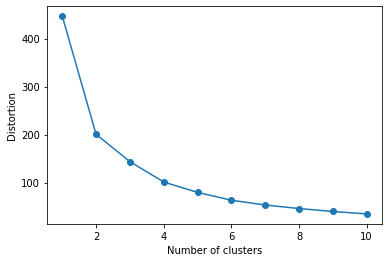

In [54]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df_data)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**The position of "elbow" is around #cluster of 2**  

#### Execute clustering (#cluster=2)  
**Ans.2**  

In [55]:
n_cls = 2
km = KMeans(n_clusters=n_cls, random_state=7)
cls = km.fit_predict(df_data)

#### See the results of clustering  

In [56]:
print(cls)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Draw scatter plot  

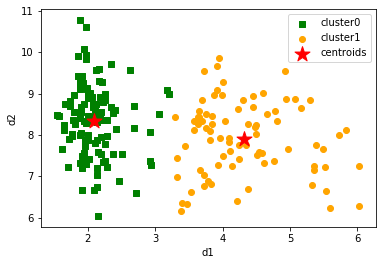

In [57]:
colors = ['green', 'orange']
markers = ['s', 'o']
for i in range(n_cls):
    df_cls = df_data[ cls==i ]
    plt.scatter(df_cls['d1'], df_cls['d2'],
                c=colors[i], marker=markers[i],
                label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*', c='red',
            label='centroids')
plt.xlabel('d1')
plt.ylabel('d2')
plt.legend()
plt.show()

##### Cross table
**Ans.3**  

In [58]:
ct = pd.crosstab(df['type'], cls)
display(ct)

col_0,0,1
type,,
v1,18,82
v2,100,0


**Ans.4**

**About 80% of v1 is included in cluster 1.
All of v2 is included in cluster 0.
We can see high correspondence between the type of virus and the cluster number, so values of "d1" and "d2" used for clustering is highly related to the type of virus.**

**v1の約80%がクラスタ1に含まれる。
v2はすべてクラスタ0に含まれる。
ウイルスの種類とクラスタ番号はよく対応しており、
クラスタリングに用いた指標d1, d2 は「ウイルスの種類」に強く関連しているといえる。**